In [19]:
import numpy as np
from dataset import training_pixels, training_labels, test_pixels
from PIL import Image
import matplotlib.pyplot as plt

learning_rate = 0.05
np.random.seed(0)


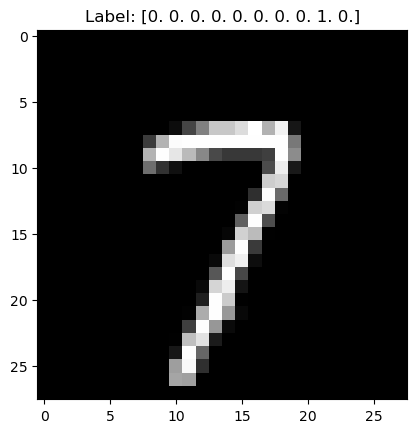

In [20]:
sample_image = training_pixels[18].reshape(28, 28)  


plt.imshow(sample_image, cmap='gray')  
plt.title(f'Label: {training_labels[318]}')  
plt.show()


In [21]:
def cost(a, y):
    return (1/2)*((a-y)**2)

def cross_entropy_loss(y_pred, y_true):
    return -np.sum(y_true * np.log(y_pred))


def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x) * (1- sigmoid(x))

def softmax(x):
    
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def load_and_preprocess_image(filepath):
    image = Image.open(filepath).convert('L')
    image = image.resize((28, 28))
    image_array = np.array(image)/255.0
    #image_array = 1 - image_array  # Ligne à commenter si les chiffres sont noirs sur blanc
    image_array = image_array.reshape(784, 1)
    return image_array

In [22]:





w1 = np.random.rand(200, 784) * 0.01
b1 = np.random.rand(200, 1)* 0.01

w2 = np.random.rand(80, 200)* 0.01
b2 = np.random.rand(80, 1)* 0.01


w3 = np.random.rand(10, 80)* 0.01
b3 = np.random.rand(10, 1)* 0.01



train_input = training_pixels[:10000]
train_output = training_labels[:10000]

test_input = test_pixels[10000:12500]





for j in range(0, 10):
    total_loss = 0
    for i in range(len(train_input)):
        X = train_input[i].reshape(784,1) #(784x1)
        Y = train_output[i].reshape(10, 1) #(10x1)
        
        
        #forward propagation
        z1 = w1.dot(X)+b1; # ((200x784) . (784x1)) + (200x1) = (200x1)   
        a1 = sigmoid(z1) # (200x1)
        z2 = w2.dot(a1)+b2 # (80x200) . (200x1) + (80x1) = (80x1)
        a2 = sigmoid(z2) # (80x1)
        z3 = w3.dot(a2)+b3 # (10x80) . (80x1) + (10x1) = (10x1)
        a3 = softmax(z3) #(10x1)
        
        
        total_loss += cross_entropy_loss(a3, Y)


        #back propagation
        g_loss_z3 = a3-Y # (10x1) - (10x1) = (10x1)
        g_loss_w3 = g_loss_z3.dot(a2.T) # (10x1) . (1x80) = (10x80) 
        g_loss_b3 = g_loss_z3 #(10x1)


        g_loss_z2 = w3.T.dot(g_loss_z3) * sigmoid_derivative(z2) # ((80x10) . (10x1)) * (80x1) = 80x1
        g_loss_w2 = g_loss_z2.dot(a1.T) # (80x1) . (1x200) = (80x200) 
        g_loss_b2 = g_loss_z2
        
        g_loss_z1 = w2.T.dot(g_loss_z2) * sigmoid_derivative(z1) # (200x80) . (80x1) * (200x1) = (200x1)
        g_loss_w1 = g_loss_z1.dot(X.T) # (200x1) . (1x784) = (200x784)
        g_loss_b1 = g_loss_z1
        # (200x784)


        w1 = w1 - learning_rate*g_loss_w1
        b1 = b1 - learning_rate*g_loss_b1
        w2 = w2 - learning_rate*g_loss_w2
        b2 = b2 - learning_rate*g_loss_b2
        w3 = w3 - learning_rate*g_loss_w3
        b3 = b3 - learning_rate*g_loss_b3

    
    
     
    avg_loss = total_loss / len(train_input) 
    print(f"Epoch {j}, Loss: {avg_loss}")

    










Epoch 0, Loss: 1.9989277355884805
Epoch 1, Loss: 1.5805022589591058
Epoch 2, Loss: 0.822835304504689
Epoch 3, Loss: 0.4233025069218784
Epoch 4, Loss: 0.29933196082590297
Epoch 5, Loss: 0.2296863710265824
Epoch 6, Loss: 0.18408057072187642
Epoch 7, Loss: 0.1486529993915378
Epoch 8, Loss: 0.12002067466600108
Epoch 9, Loss: 0.09733709548038345


In [23]:



def prediction(X, w1, b1, w2, b2, w3, b3):
    X = X.reshape(784,1) #(784x1)
    
    z1 = w1.dot(X)+b1; # ((200x784) . (784x1)) + (200x1) = (200x1)   
    a1 = sigmoid(z1) # (200x1)
    z2 = w2.dot(a1)+b2 # (80x200) . (200x1) + (80x1) = (80x1)
    a2 = sigmoid(z2) # (80x1)
    z3 = w3.dot(a2)+b3 # (10x80) . (80x1) + (10x1) = (10x1)
    a3 = softmax(z3) #(10x1)
    return a3



def show_image(image):
    sample_image = image.reshape(28, 28)
    plt.imshow(sample_image, cmap='gray')
    plt.show()



def test_model(image):
    show_image(image)
    p = prediction(image, w1, b1, w2, b2, w3, b3)
    print(p.argmax())







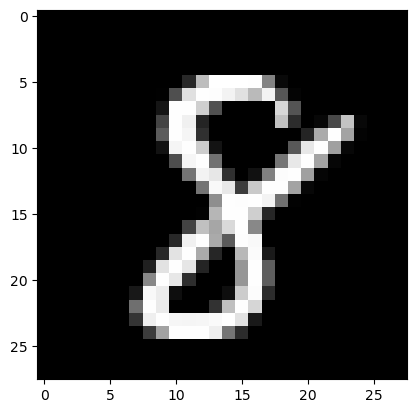

8


In [24]:
test_model(test_input[22])

In [26]:


def predict_digit_from_image(image_path):

    img = Image.open(image_path)
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.reshape(img_array, (1, 28, 28))
    p = prediction(img_array, w1, b1, w2, b2, w3, b3)### /!\ atention à la normalisation en divisant par 255
    return p.argmax()